In [36]:
import os

os.environ["TF_ENABLE_ONEDNN_OPTS"] = "0"

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import joblib

In [37]:
CSV_PATH = os.path.join(os.getcwd(), "data", "data.csv")
MODEL_PATH = os.path.join(os.getcwd(), "model", "dtmodel.joblib")

In [38]:
df = pd.read_csv(
    CSV_PATH,
    header=None,
)
data = [tuple(map(int, row)) for row in df.values]
X = np.array([d[:2] for d in data])
y = np.array([d[2] for d in data]).astype(int)

In [39]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [40]:
clf = DecisionTreeClassifier(random_state=42, max_depth=1)

In [41]:
clf.fit(X_train, y_train)
joblib.dump(clf, MODEL_PATH)

['c:\\Users\\David\\ia\\phaser\\model\\dtmodel.joblib']

In [45]:
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
predict = clf.predict(np.array([[-5, 660]]))[0]
print(predict)

Accuracy: 0.9212253829321663
0


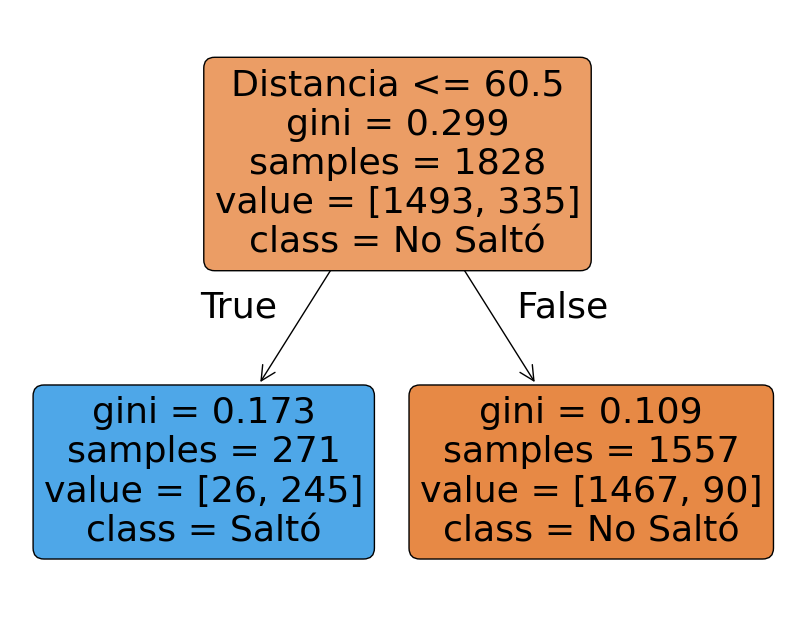

In [34]:
plt.figure(figsize=(10, 8))
plot_tree(
    clf,
    filled=True,
    feature_names=["Velocidad", "Distancia"],
    class_names=["No Saltó", "Saltó"],
    rounded=True,
)
plt.show()